# EDA for Ted Talks Data

Name: Parker Lambert


## Libraries

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


## Data

In [54]:
df = pd.read_csv("ted_talks.csv")
df[:6]

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
5,The tragedy of air pollution — and an urgent d...,Rosamund Adoo-Kissi-Debrah,October 2021,422000,12000,https://ted.com/talks/rosamund_adoo_kissi_debr...


## Data Overview

### Check Column Types

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB
None


From the output above we can see that we have 6 columns: ***title***, ***author***, ***date*** (month year), ***views***, ***likes***, ***link***

Currently only two columns are numeric ***views*** & ***likes*** and just from exsiting knowledge I know these to be continuous.

Some questions this data allows me to hypothesis are:

- Does the amount of ***views*** affect the number of ***likes*** in a predictable pattern?

- Does the ***title*** affect the number of ***views***/ ***likes***?
    - Length?
    - Wording?

- Does the ***date*** of publish affect the number of ***views***/ ***likes***?

### Summary of Numerical Columns

Numerical Summary

In [9]:
print(df.describe())

              views         likes
count  5.440000e+03  5.440000e+03
mean   2.061576e+06  6.260762e+04
std    3.567098e+06  1.076468e+05
min    5.320000e+02  1.500000e+01
25%    6.707500e+05  2.000000e+04
50%    1.300000e+06  4.050000e+04
75%    2.100000e+06  6.500000e+04
max    7.200000e+07  2.100000e+06


##### Visual Summary

Views:

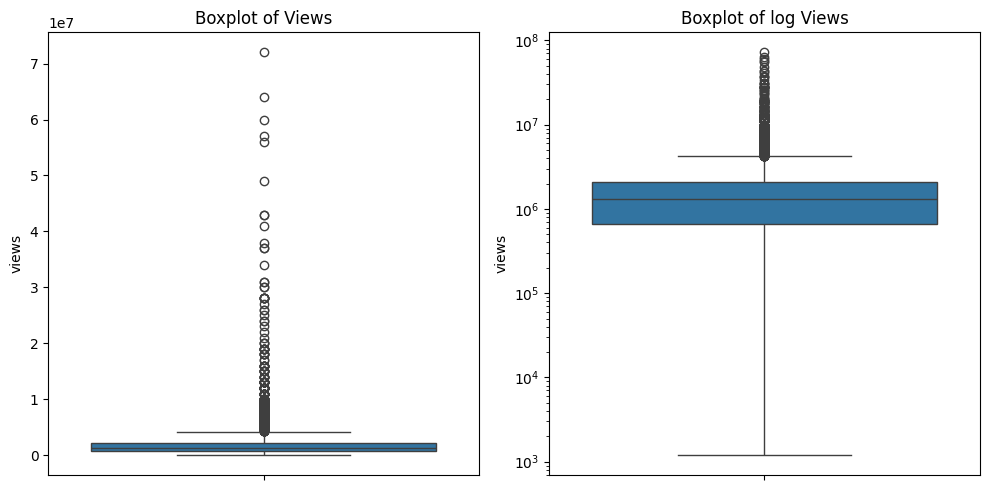

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

# Histogram of Views
sns.boxplot(df['views'], ax=axes[0])
axes[0].set_title('Boxplot of Views') 

# Histogram of likes
sns.boxplot(df['views'], ax=axes[1])
axes[1].set_title('Boxplot of log Views')
axes[1].set_yscale('log')


# Display the plots
plt.tight_layout()  
plt.show()

Likes:

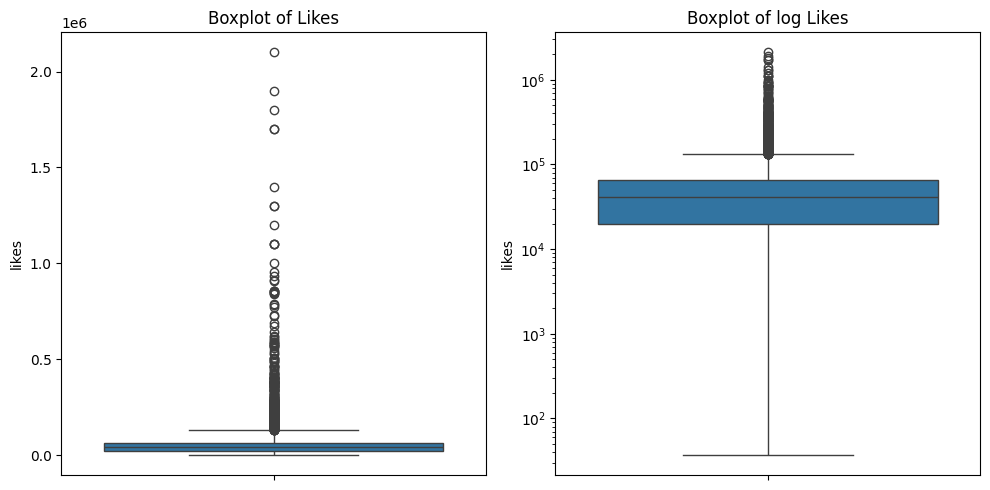

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

# Histogram of Views
sns.boxplot(df['likes'], ax=axes[0])
axes[0].set_title('Boxplot of Likes') 

# Histogram of likes
sns.boxplot(df['likes'], ax=axes[1])
axes[1].set_title('Boxplot of log Likes')
axes[1].set_yscale('log')

# Display the plots
plt.tight_layout()  
plt.show()

Both Views and Likes are right skewed

### Data Cleaning

First we will check if there are any nulls in our data set

In [10]:
print(df.isnull().sum())

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64


We can see that there is only one null it is an autor. Since we have so few it is okay to just drop that one instance.

In [13]:
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5439 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5439 non-null   object
 1   author  5439 non-null   object
 2   date    5439 non-null   object
 3   views   5439 non-null   int64 
 4   likes   5439 non-null   int64 
 5   link    5439 non-null   object
dtypes: int64(2), object(4)
memory usage: 297.4+ KB
None


## Exploritory Analysis

### Exploring Views and Likes and their Relationship

#### Histograms

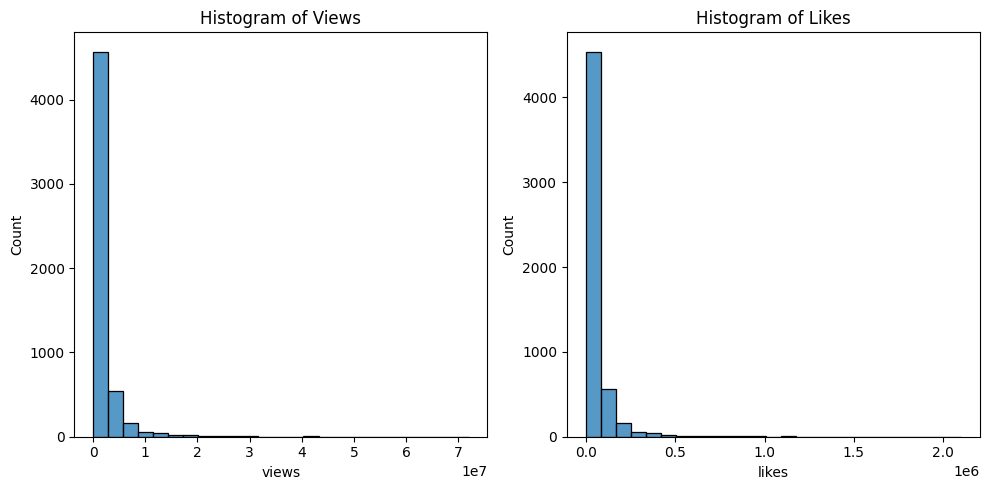

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

# Histogram of Views
sns.histplot(df['views'],bins=25, ax=axes[0])
axes[0].set_title('Histogram of Views') 

# Histogram of likes
sns.histplot(df['likes'],bins=25, ax=axes[1])
axes[1].set_title('Histogram of Likes')

# Display the plots
plt.tight_layout()  
plt.show()

#### Scatter-plot

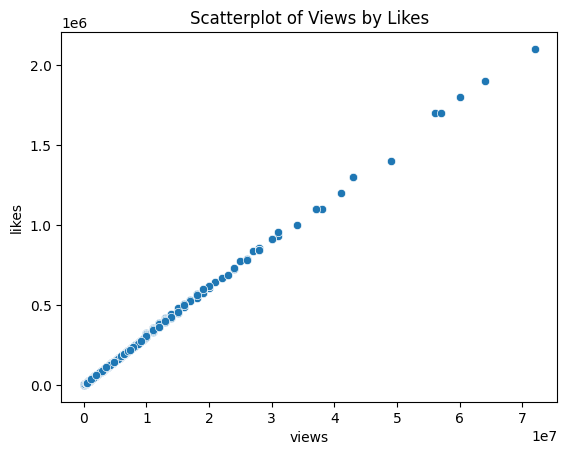

In [33]:
sns.scatterplot(x='views', y='likes', data=df)
# Add plots
plt.title('Scatterplot of Views by Likes')
# Display plot
plt.show()

From our scatter plot we can see that the relationship appears to be linear. Next step is to test that assumption.

#### Linear Model for View by Likes

In [82]:
lm = smf.ols('views ~ likes', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.018e+06
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:21:35   Log-Likelihood:                -69946.
No. Observations:                5440   AIC:                         1.399e+05
Df Residuals:                    5438   BIC:                         1.399e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.235e+04   1456.752     -8.480      0.000   -1.52e+04   -9497.547
likes         33.1258      0.012   2831.540      0.000      33.103      33.149
==============================================================================
Omnibus:                     7096.046   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14939756.255
Skew:                           6.329   Prob(JB):                         0.00
Kurtosis:                     259.419   Cond. No.                     1.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Takaways from linear model:
- likes is a significant predictor of views with a pvalue of less than 0.05
- For every one increase in Likes Views the best estimate for views increases by 33.1258
- Our model accounts for 99.9% of the variability in likes

## Exploring Titles 

Word Length

Includes Question

Includes Number

### Word Length of Title affects on Views/ Likes    

In [69]:
df['word_count_title'] = df['title'].str.split().str.len()

#### Scatterplot

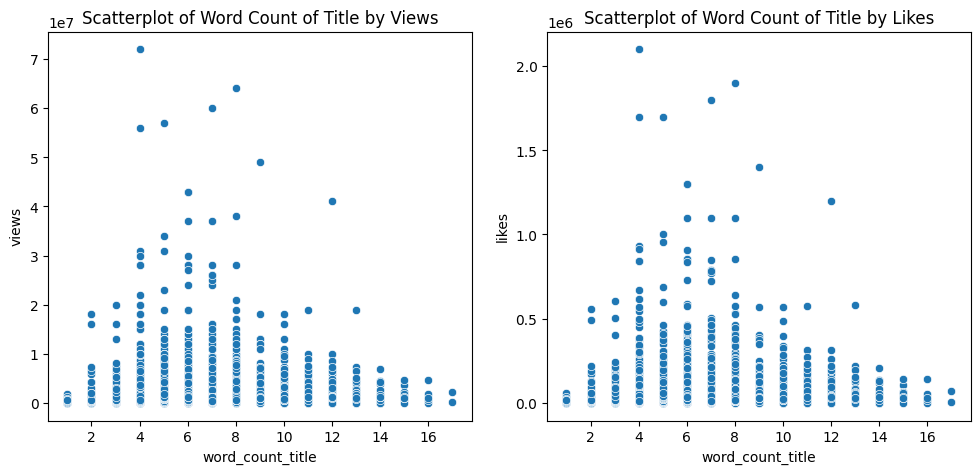

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

# Scatterplot of Word Count of Title by Views
sns.scatterplot(x='word_count_title', y='views', data=df, ax=axes[0])
axes[0].set_title('Scatterplot of Word Count of Title by Views') 

# Scatterplot of Word Count of Title by likes
sns.scatterplot(x='word_count_title', y='likes', data=df, ax=axes[1])
axes[1].set_title('Scatterplot of Word Count of Title by Likes')

# Display the plots
plt.tight_layout()  
plt.show()

The extremes of word count appear to have negative effects on views.

#### Boxplots for change in Views/ Likes by Word Count

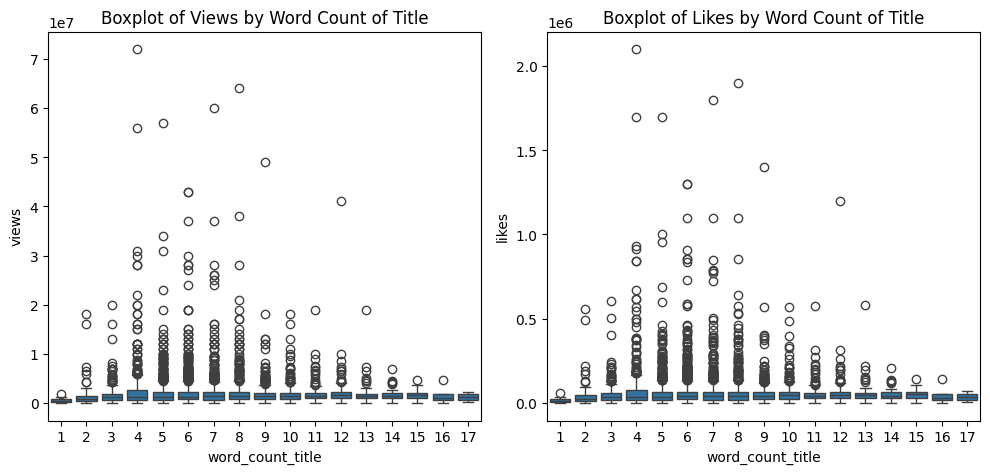

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

# Boxplot of Views by some categorical variable (for example, 'word_count_title' if it's categorical)
sns.boxplot(x='word_count_title', y='views', data=df, ax=axes[0])  # Adjust x as needed
axes[0].set_title('Boxplot of Views by Word Count of Title') 
# axes[0].set_yscale('log')

# Boxplot of Likes by the same categorical variable
sns.boxplot(x='word_count_title', y='likes', data=df, ax=axes[1])  # Adjust x as needed
axes[1].set_title('Boxplot of Likes by Word Count of Title')
# axes[1].set_yscale('log')

# Display the plots
plt.tight_layout()  
plt.show()


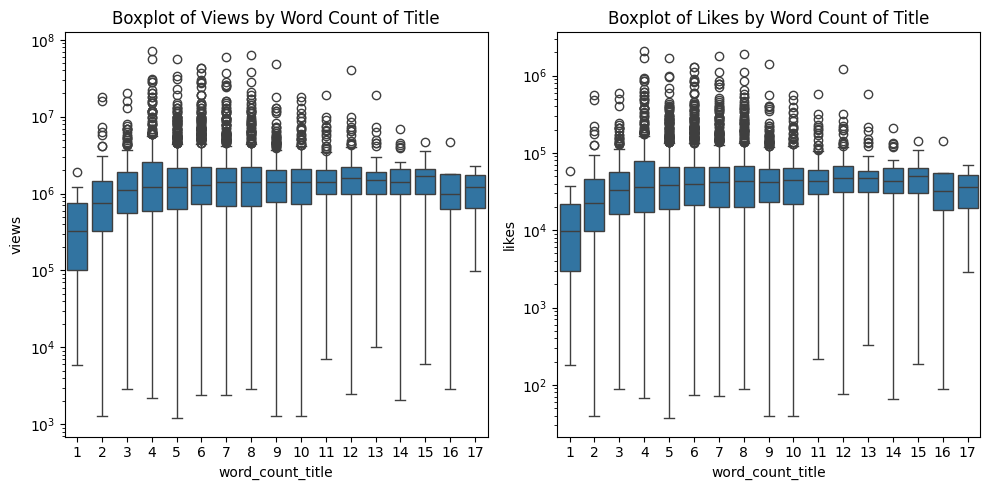

In [41]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

# Boxplot of Views by some categorical variable (for example, 'word_count_title' if it's categorical)
sns.boxplot(x='word_count_title', y='views', data=df, ax=axes[0])  # Adjust x as needed
axes[0].set_title('Boxplot of Views by Word Count of Title') 
axes[0].set_yscale('log')

# Boxplot of Likes by the same categorical variable
sns.boxplot(x='word_count_title', y='likes', data=df, ax=axes[1])  # Adjust x as needed
axes[1].set_title('Boxplot of Likes by Word Count of Title')
axes[1].set_yscale('log')

# Display the plots
plt.tight_layout()  
plt.show()


From the log boxcharts we can see that there appears to be a meaningful difference for changing word counts.

#### Linear Model for Word Count

In [105]:
lmwc = smf.ols('views ~ word_count_title', data=df).fit()
lmwc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.476
Date:                Wed, 28 Feb 2024   Prob (F-statistic):             0.0623
Time:                        17:24:55   Log-Likelihood:                -89791.
No. Observations:                5440   AIC:                         1.796e+05
Df Residuals:                    5438   BIC:                         1.796e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.313e+06   1.43e+05     16.148      0.000    2.03e+06    2.59e+06
word_count_title -3.622e+04   1.94e+04     -1.864      0.062   -7.43e+04    1867.278
==============================================================================
Omnibus:                     7711.549   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2614954.511
Skew:                           8.336   Prob(JB):                         0.00
Kurtosis:                     109.106   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Takeaways from linear model:
- word count is not a statistically significant predictor for views
- noteable that it shows a negative relationship  

#### Anova for Word Count

In [101]:
WCmodel = ols('likes ~ C(word_count_title)', data=df).fit()
sm.stats.anova_lm(WCmodel, typ=2)

,sum_sq,df,F,PR(>F)
C(word_count_title),3.492415e+11,16.0,1.888589,0.017128
Residual,6.267695e+13,5423.0,NaN,NaN


Takeaways from anova:
- There is a statistically significant difference in variation between atleast two of the word count groups

### Title Contains Question?

In [88]:
df['contains_question'] = df['title'].str.contains('\?').astype(int)

#### Boxplots

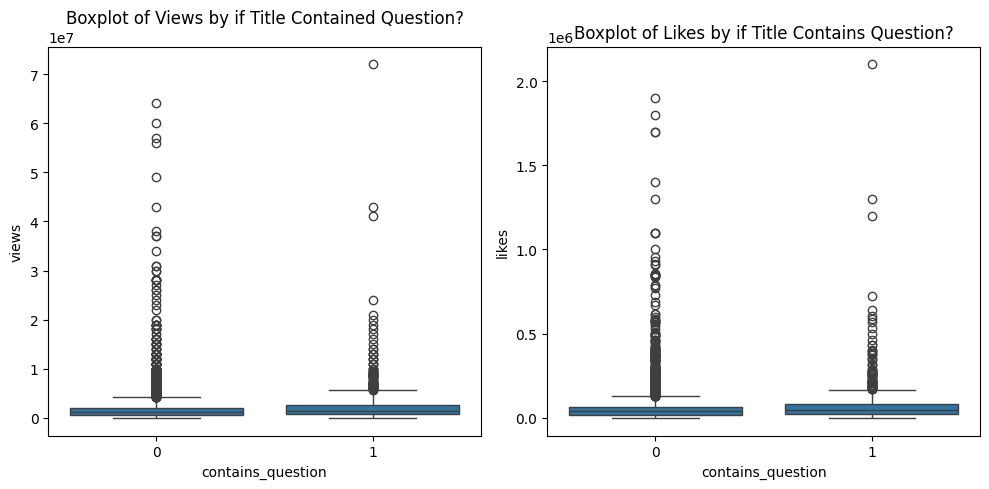

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

# Boxplot of Views by some categorical variable (for example, 'word_count_title' if it's categorical)
sns.boxplot(x='contains_question', y='views', data=df, ax=axes[0])  # Adjust x as needed
axes[0].set_title('Boxplot of Views by if Title Contained Question?') 
# axes[0].set_yscale('log')

# Boxplot of Likes by the same categorical variable
sns.boxplot(x='contains_question', y='likes', data=df, ax=axes[1])  # Adjust x as needed
axes[1].set_title('Boxplot of Likes by if Title Contains Question?')
# axes[1].set_yscale('log')

# Display the plots
plt.tight_layout()  
plt.show()

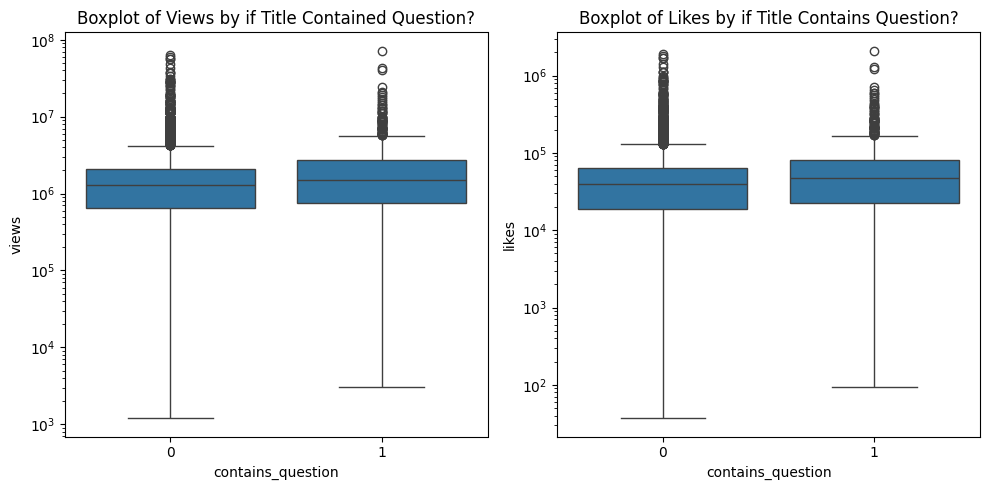

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

# Boxplot of Views by some categorical variable (for example, 'word_count_title' if it's categorical)
sns.boxplot(x='contains_question', y='views', data=df, ax=axes[0])  # Adjust x as needed
axes[0].set_title('Boxplot of Views by if Title Contained Question?') 
axes[0].set_yscale('log')

# Boxplot of Likes by the same categorical variable
sns.boxplot(x='contains_question', y='likes', data=df, ax=axes[1])  # Adjust x as needed
axes[1].set_title('Boxplot of Likes by if Title Contains Question?')
axes[1].set_yscale('log')

# Display the plots
plt.tight_layout()  
plt.show()

There appears to be a difference between titles that contain a question and those that do not.

#### Anova

In [103]:
Qmodel = ols('likes ~ C(contains_question)', data=df).fit()
sm.stats.anova_lm(Qmodel, typ=2)

,sum_sq,df,F,PR(>F)
C(contains_question),1.847067e+11,1.0,15.983626,0.000065
Residual,6.284148e+13,5438.0,NaN,NaN


Takeaways from anova:
- There is a statistically significant difference in variation between titles that contain a question and those that do not.

### Title Contains Number?

In [55]:
df['contains_number'] = df['title'].str.contains('\d').astype(int)

#### Boxplots

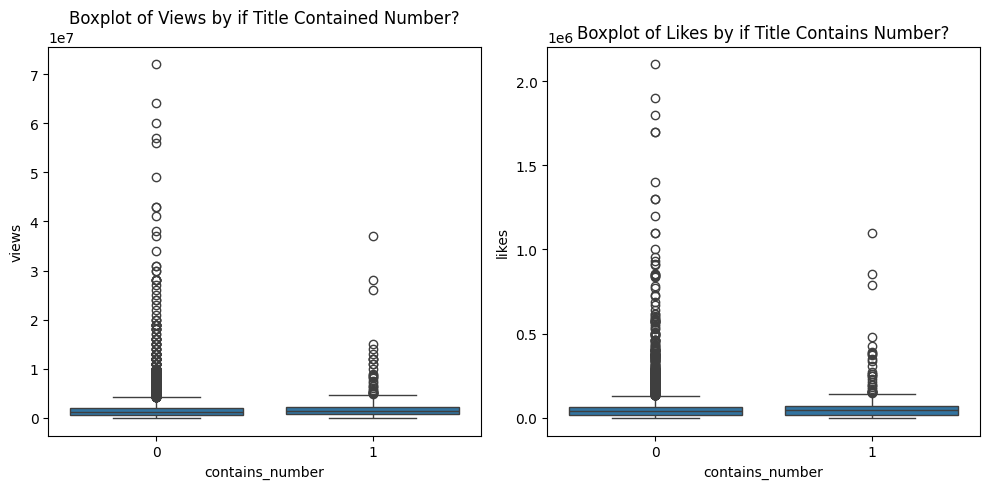

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

# Boxplot of Views by some categorical variable (for example, 'word_count_title' if it's categorical)
sns.boxplot(x='contains_number', y='views', data=df, ax=axes[0])  # Adjust x as needed
axes[0].set_title('Boxplot of Views by if Title Contained Number?') 
# axes[0].set_yscale('log')

# Boxplot of Likes by the same categorical variable
sns.boxplot(x='contains_number', y='likes', data=df, ax=axes[1])  # Adjust x as needed
axes[1].set_title('Boxplot of Likes by if Title Contains Number?')
# axes[1].set_yscale('log')

# Display the plots
plt.tight_layout()  
plt.show()

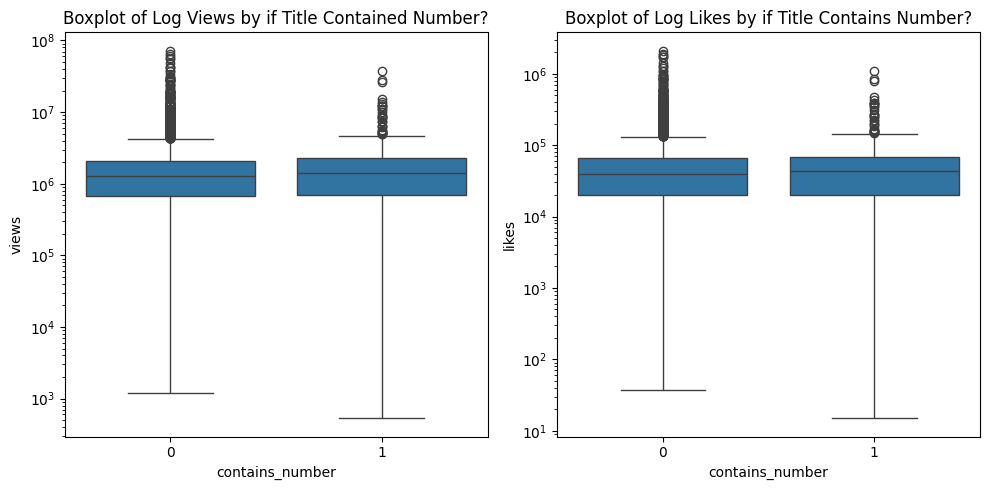

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

# Boxplot of Views by some categorical variable (for example, 'word_count_title' if it's categorical)
sns.boxplot(x='contains_number', y='views', data=df, ax=axes[0])  # Adjust x as needed
axes[0].set_title('Boxplot of Log Views by if Title Contained Number?') 
axes[0].set_yscale('log')

# Boxplot of Likes by the same categorical variable
sns.boxplot(x='contains_number', y='likes', data=df, ax=axes[1])  # Adjust x as needed
axes[1].set_title('Boxplot of Log Likes by if Title Contains Number?')
axes[1].set_yscale('log')

# Display the plots
plt.tight_layout()  
plt.show()

There is no visual difference in views between titles that contain a number and those that do not. 

#### Anova

In [104]:
NUMmodel = ols('likes ~ C(contains_number)', data=df).fit()
sm.stats.anova_lm(NUMmodel, typ=2)

,sum_sq,df,F,PR(>F)
C(contains_number),1.457784e+10,1.0,1.25809,0.262062
Residual,6.301161e+13,5438.0,NaN,NaN


Takaways from anova:
- Confirms that there is no statistically significant difference between titles containing a number and those that do not.

## Date

For Date it would be interesting to see:
1. If earlier ted talks average less ***views***, maybed because of less internet users or, more ***views*** because of increased time uploaded
2. Would be interesting to see if different months/ times of the year have differing effects on ***views***

First I started by converting our object date column to type datetime 

In [108]:
# df[:6]
df['date'] = pd.to_datetime(df['date'], format='%B %Y')
# df[:6]

### Basic Scatterplot for date

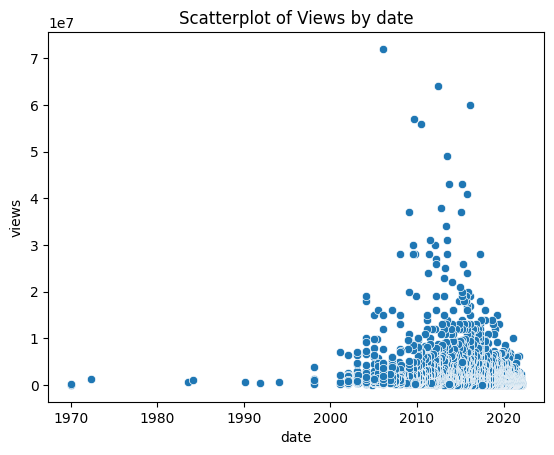

In [110]:
sns.scatterplot(x='date', y='views', data=df)
# Add plots
plt.title('Scatterplot of Views by date')
# Display plot
plt.show()

### A look at change over the years

create new year variable

In [111]:
df['year'] = df['date'].dt.year

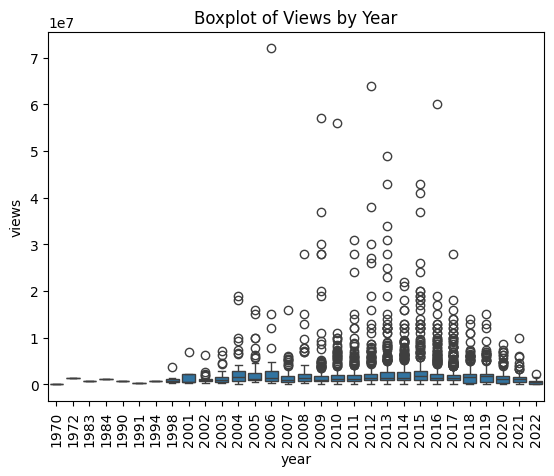

In [121]:
sns.boxplot(x='year', y='views', data=df) 
plt.title('Boxplot of Views by Year') 
plt.xticks(rotation=90)
# Display plot
plt.show()

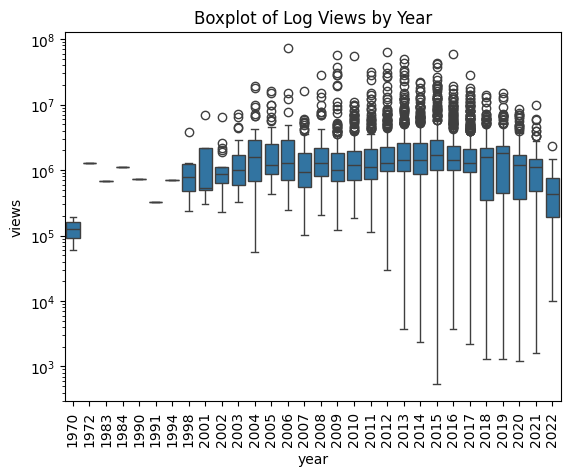

In [119]:

sns.boxplot(x='year', y='views', data=df) 
plt.title('Boxplot of Log Views by Year') 
plt.xticks(rotation=90)
# Display plot
plt.yscale('log')
plt.show()

This is pretty obvious that there is a difference in variance between years.

### Now a look at different months 

create new month column

In [116]:
df['month'] = df['date'].dt.month

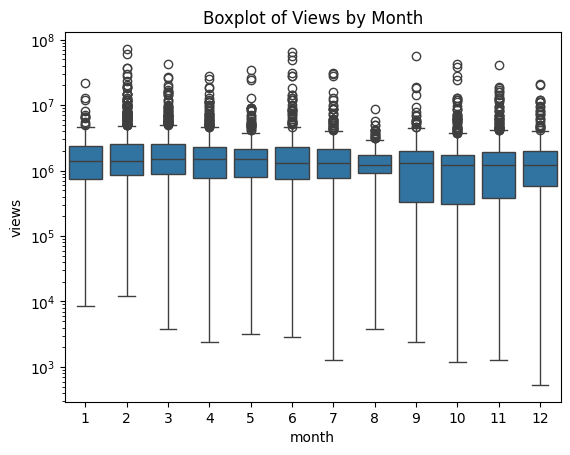

In [126]:
sns.boxplot(x='month', y='views', data=df) 
plt.title('Boxplot of Views by Month') 
# plt.xticks(rotation=90)
plt.yscale("log")
# Display plot
plt.show()

There appears to be a difference in variation of views depending on the month posted.

### Anova

In [125]:
NUMmodel = ols('views ~ month', data=df).fit()
sm.stats.anova_lm(NUMmodel, typ=2)

,sum_sq,df,F,PR(>F)
month,5.198265e+14,1.0,41.155032,1.525165e-10
Residual,6.868702e+16,5438.0,NaN,NaN


Takaways from anova:
- There is a statistically significant difference in variation in views depending on the month posted.

## Future Work

### Further look at Title

It would be interesting to run nlp and see which words have the largest affect on ***views***/ ***likes***.

### Author 

For author I see two areas for continued exploring:
1. See if authors that have multiple ted talks average greater ***views***/ ***likes***.
2. See if the origen of the last name of author has an affect on ***views***/ ***likes***.
